<a href="https://colab.research.google.com/github/TristanDao/Predictive-Analysis-of-Bank-Deposits/blob/main/Code_Colab_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import & processing data

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE()

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
link = 'https://drive.google.com/file/d/17BhpaRwTpd-6hHYaHcbzGWoZeZDpRc-O/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0,1,1,1,10134888,1
1,15647311,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,15619304,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,15701354,699,France,Female,39,1,0,2,0,0,9382663,0
4,15737888,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Tắt định dạng khoa học( scientific notation)
pd.set_option('display.float_format', '{:.0f}'.format)

In [ ]:
df.describe(include = 'all')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,651,NaN,NaN,39,5,6980471,2,1,1,9089385,0
std,97,NaN,NaN,10,3,6285896,1,0,0,6128208,0
min,350,NaN,NaN,18,0,0,1,0,0,523,0
25%,584,NaN,NaN,32,3,0,1,0,0,3336751,0
50%,652,NaN,NaN,37,5,8668510,1,1,1,8890572,0
75%,718,NaN,NaN,44,7,12462152,2,1,1,14395293,0


In [ ]:
#Bật lại định dạng khoa học( scientific notation)
#pd.reset_option('display.float_format')

#EDA

In [ ]:
#Remove meaningless columns
df.drop(columns = 'customer_id', inplace = True)

In [ ]:
Cate_columns = df.select_dtypes(['object']).columns
Cate_columns

Index(['country', 'gender'], dtype='object')

In [ ]:
num_columns = df.select_dtypes(['int','float']).columns
num_columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

## Univate analysis

### Each distriubtion plot

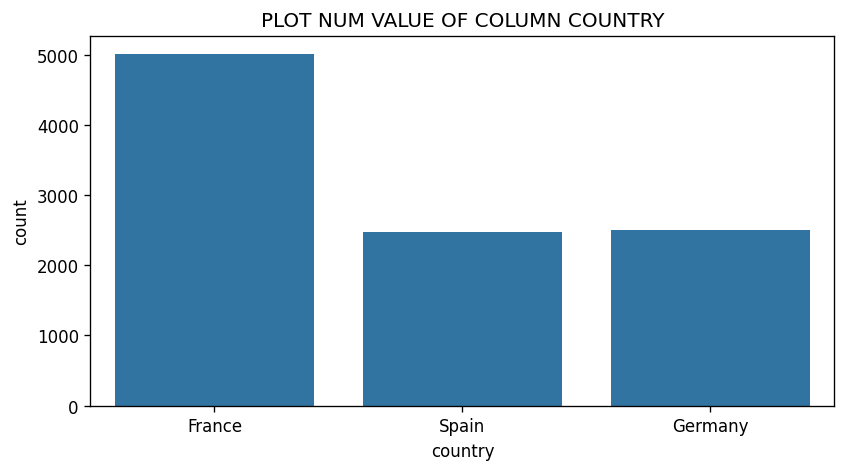

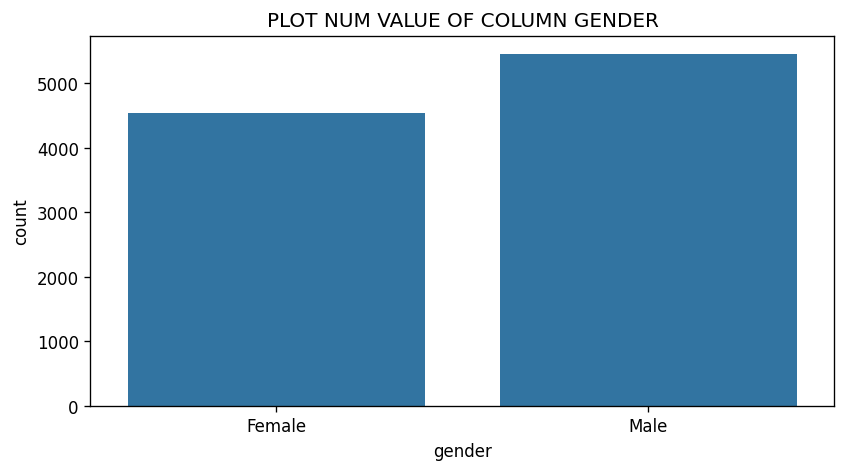

In [ ]:
#Viz category columns  by bar plot
def viz_cate(col):
  plt.figure(figsize = (8,4), dpi = 120)
  sns.countplot(x = col, data = df)
  plt.title(f'PLOT NUM VALUE OF COLUMN {col.upper()}')
  plt.show()
for col in Cate_columns:
  viz_cate(col)

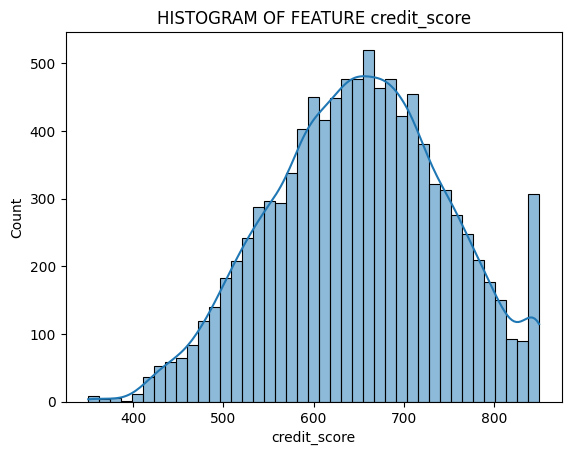

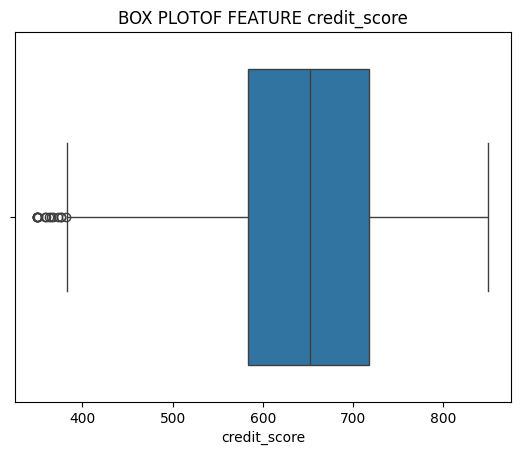

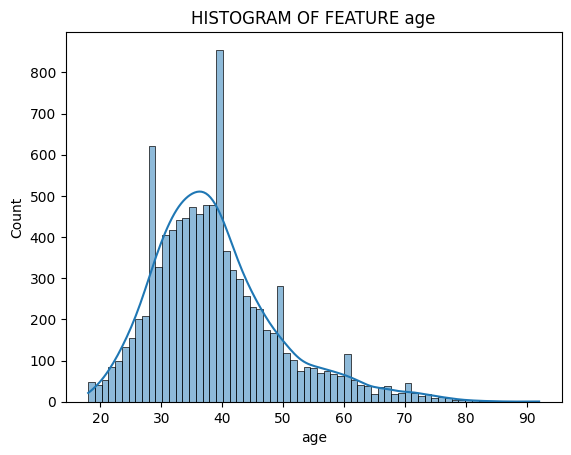

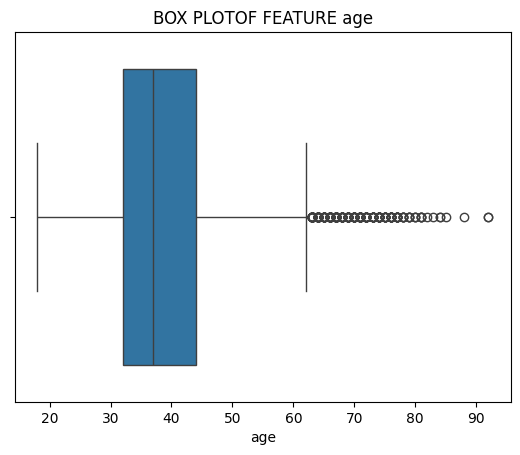

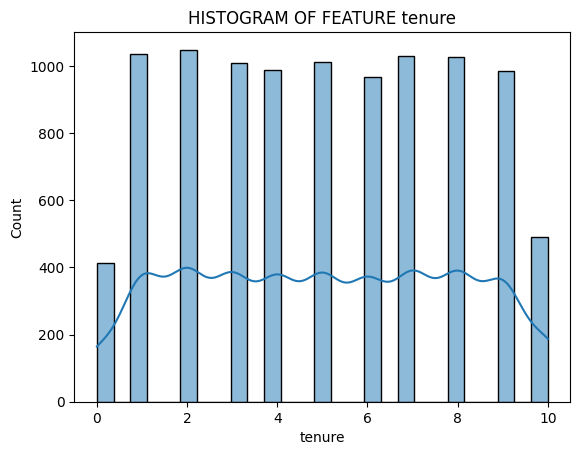

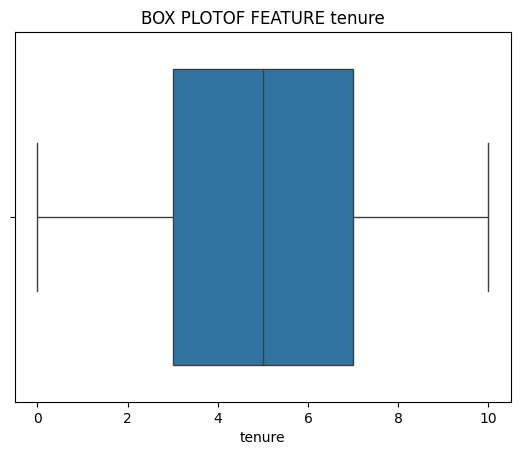

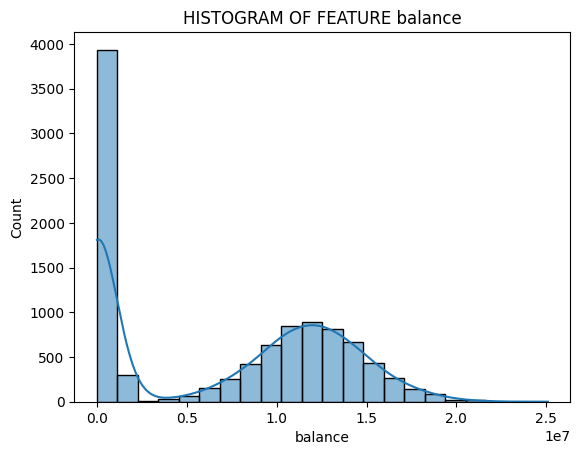

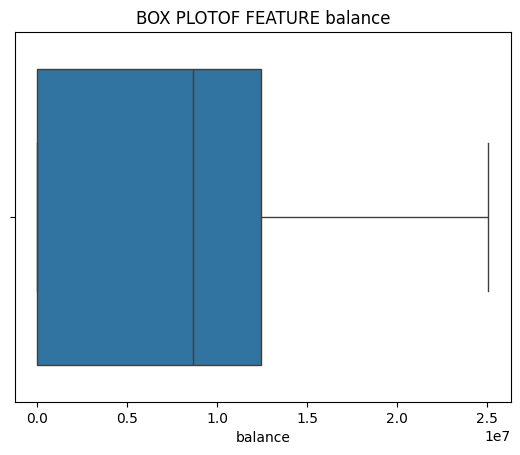

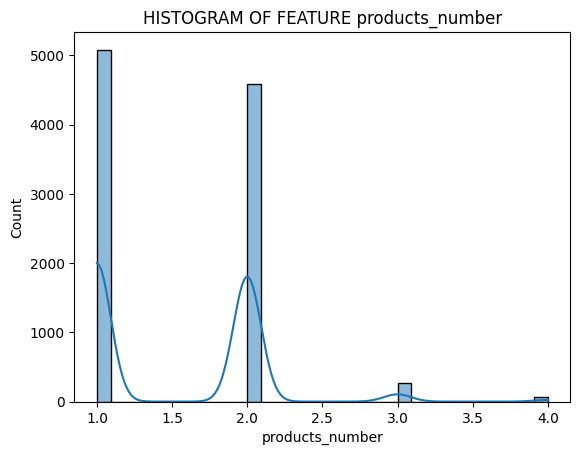

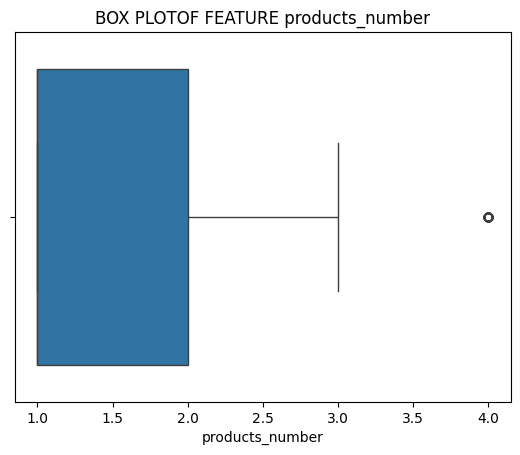

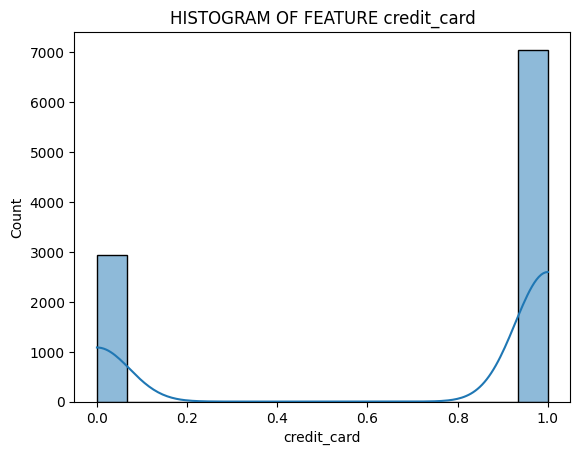

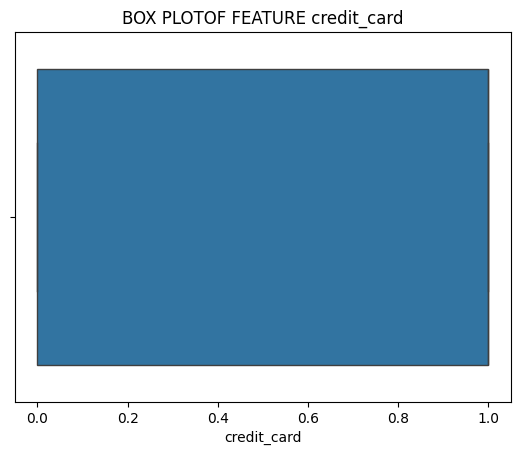

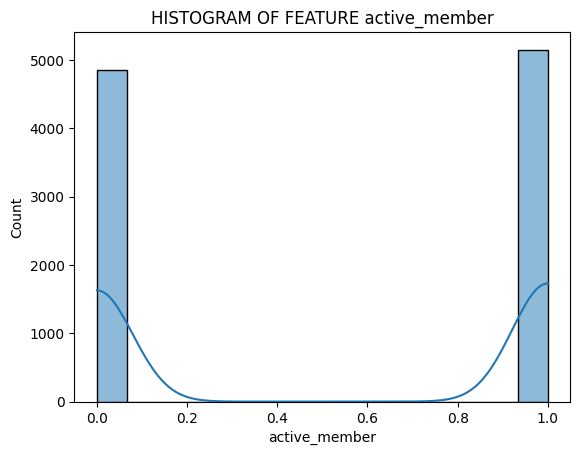

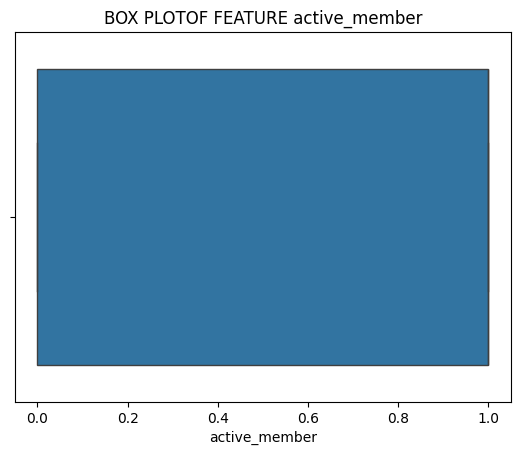

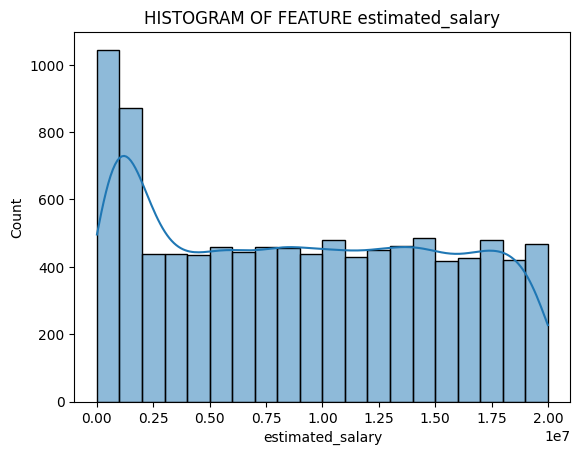

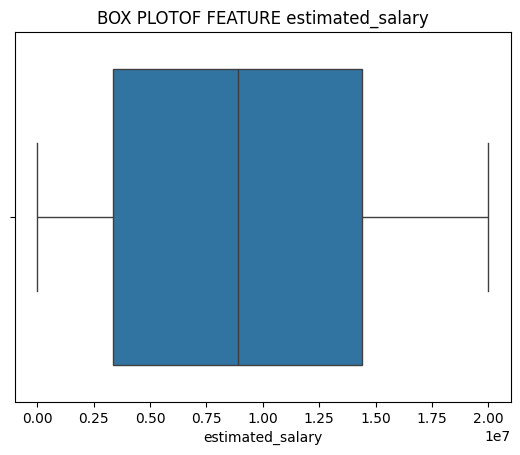

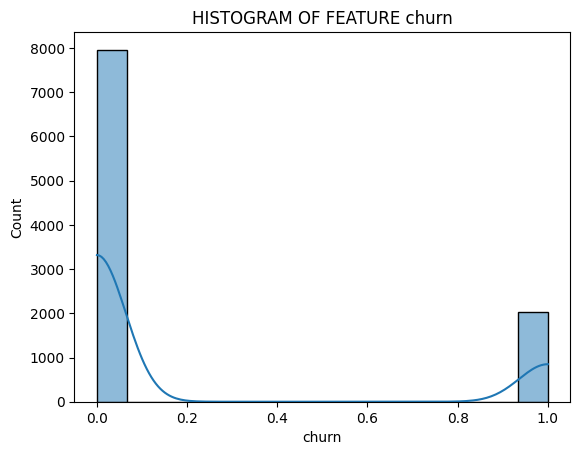

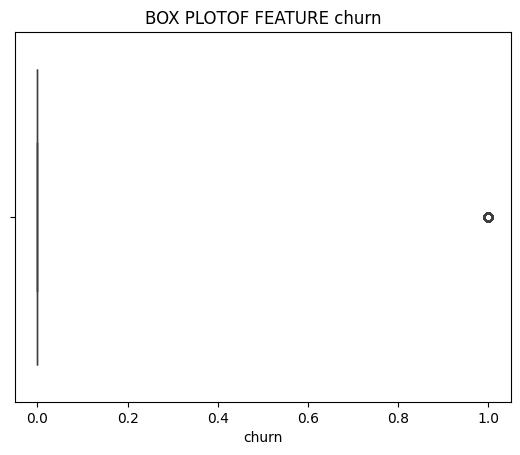

In [ ]:
#viz numeric column
def num_viz(col):
  sns.histplot(x = col, data = df, kde =  True)
  plt.title (f'HISTOGRAM OF FEATURE {col}')
  plt.show()
  sns.boxplot(x= col, data = df)
  plt.title(f'BOX PLOTOF FEATURE {col}')
  plt.show()
for col in num_columns:
  num_viz(col)

### Summary distribution plot

<ipython-input-34-387e118af805>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn',data=df, palette=custom_palette)


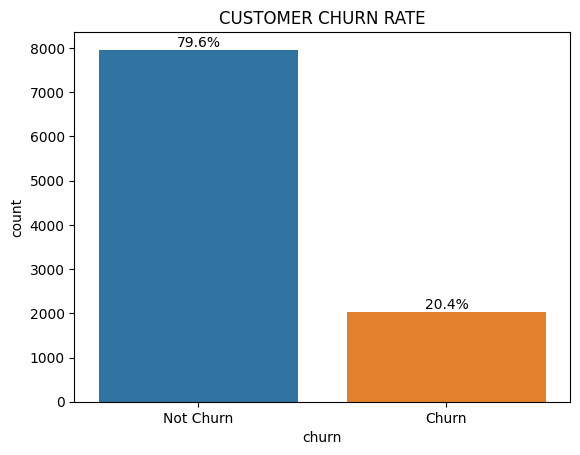

In [ ]:
custom_palette = ['#1f77b4', '#ff7f0e']
sns.countplot(x='churn',data=df, palette=custom_palette)
plt.xticks([0, 1], ['Not Churn','Churn'])
#Tính phần trăm
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.title('CUSTOMER CHURN RATE')
plt.show()

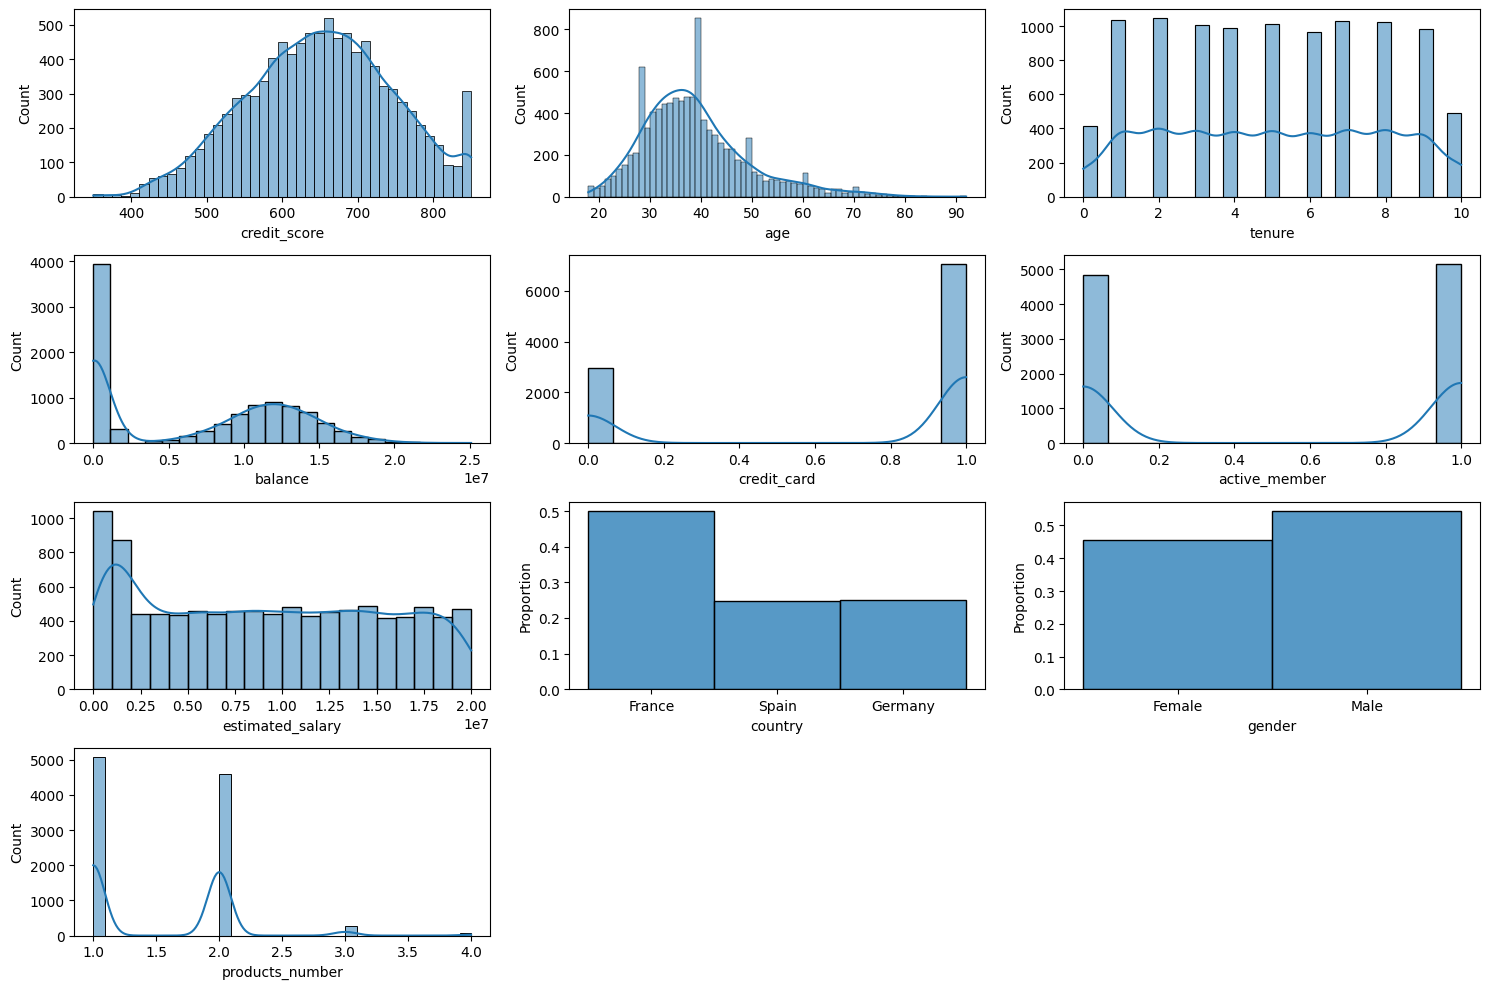

In [ ]:
plt.figure(figsize = (15 ,10))

plt.subplot2grid((4,3),(0,0))
sns.histplot(df.credit_score, kde = True)

plt.subplot2grid((4,3),(0,1))
sns.histplot(df.age, kde = True)

plt.subplot2grid((4,3),(0,2))
sns.histplot(df.tenure, kde = True)

plt.subplot2grid((4,3),(1,0))
sns.histplot(df.balance, kde = True)

plt.subplot2grid((4,3),(1,1))
sns.histplot(df.credit_card, kde = True)

plt.subplot2grid((4,3),(1,2))
sns.histplot(df.active_member, kde = True)

plt.subplot2grid((4,3),(2,0))
sns.histplot(df.estimated_salary, kde = True)

plt.subplot2grid((4,3),(2,1))
sns.histplot(df.country, stat = 'proportion')

plt.subplot2grid((4,3),(2,2))
sns.histplot(df.gender, stat = 'proportion')

plt.subplot2grid((4,3),(3,0))
sns.histplot(df.products_number, kde = True)

plt.tight_layout()


In [ ]:
'''
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout()
'''

'\nfig, ax = plt.subplots(figsize=(15,15))\npd.DataFrame.hist(df,ax=ax)\nplt.tight_layout()\n'

Summary Statistics Insights:





1.   Credit Score: The average credit score is around 650, with a minimum of 350 and a maximum of 850.
2.   Country: The dataset contains customers from three countries: France, Spain, and Germany. The most frequent country is France.

3. Age: The average age is about 39 years, with a range from 18 to 92 years.
4. Tenure: The average tenure is approximately 5 years, with values ranging from 0 to 10 years.
5. Balance: The average balance is about 6,980,471, with a large standard deviation, indicating significant variability.
6. Products Number: Most customers have around 1 or 2 products, with a maximum of 4 products.
7. Credit Card: About 70.5% of the customers have a credit card.
8. Active Member: About 51.5% of the customers are active members.
9. Estimated Salary: The average estimated salary is around 9,089,385.
10. Gender: There are more male customers (5457) than female customers (4543).
11. Churn: The churn rate is 20.4%, indicating that about one-fifth of the customers have churned.














##Bivariate analysis

In [ ]:
corr = df[['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn']].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006832,0.012238,-0.005458,0.025651,-0.000610,-0.027094
age,-0.003965,1.000000,-0.009997,0.021754,-0.030680,-0.011721,0.085472,-0.015276,0.285323
tenure,0.000842,-0.009997,1.000000,-0.016583,0.013444,0.022583,-0.028362,0.005657,-0.014001
balance,0.006832,0.021754,-0.016583,1.000000,-0.276422,-0.011052,-0.010606,0.006023,0.105839
products_number,0.012238,-0.030680,0.013444,-0.276422,1.000000,0.003183,0.009612,0.013571,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.011052,0.003183,1.000000,-0.011866,-0.006261,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010606,0.009612,-0.011866,1.000000,-0.005612,-0.156128
estimated_salary,-0.000610,-0.015276,0.005657,0.006023,0.013571,-0.006261,-0.005612,1.000000,0.003151
churn,-0.027094,0.285323,-0.014001,0.105839,-0.047820,-0.007138,-0.156128,0.003151,1.000000


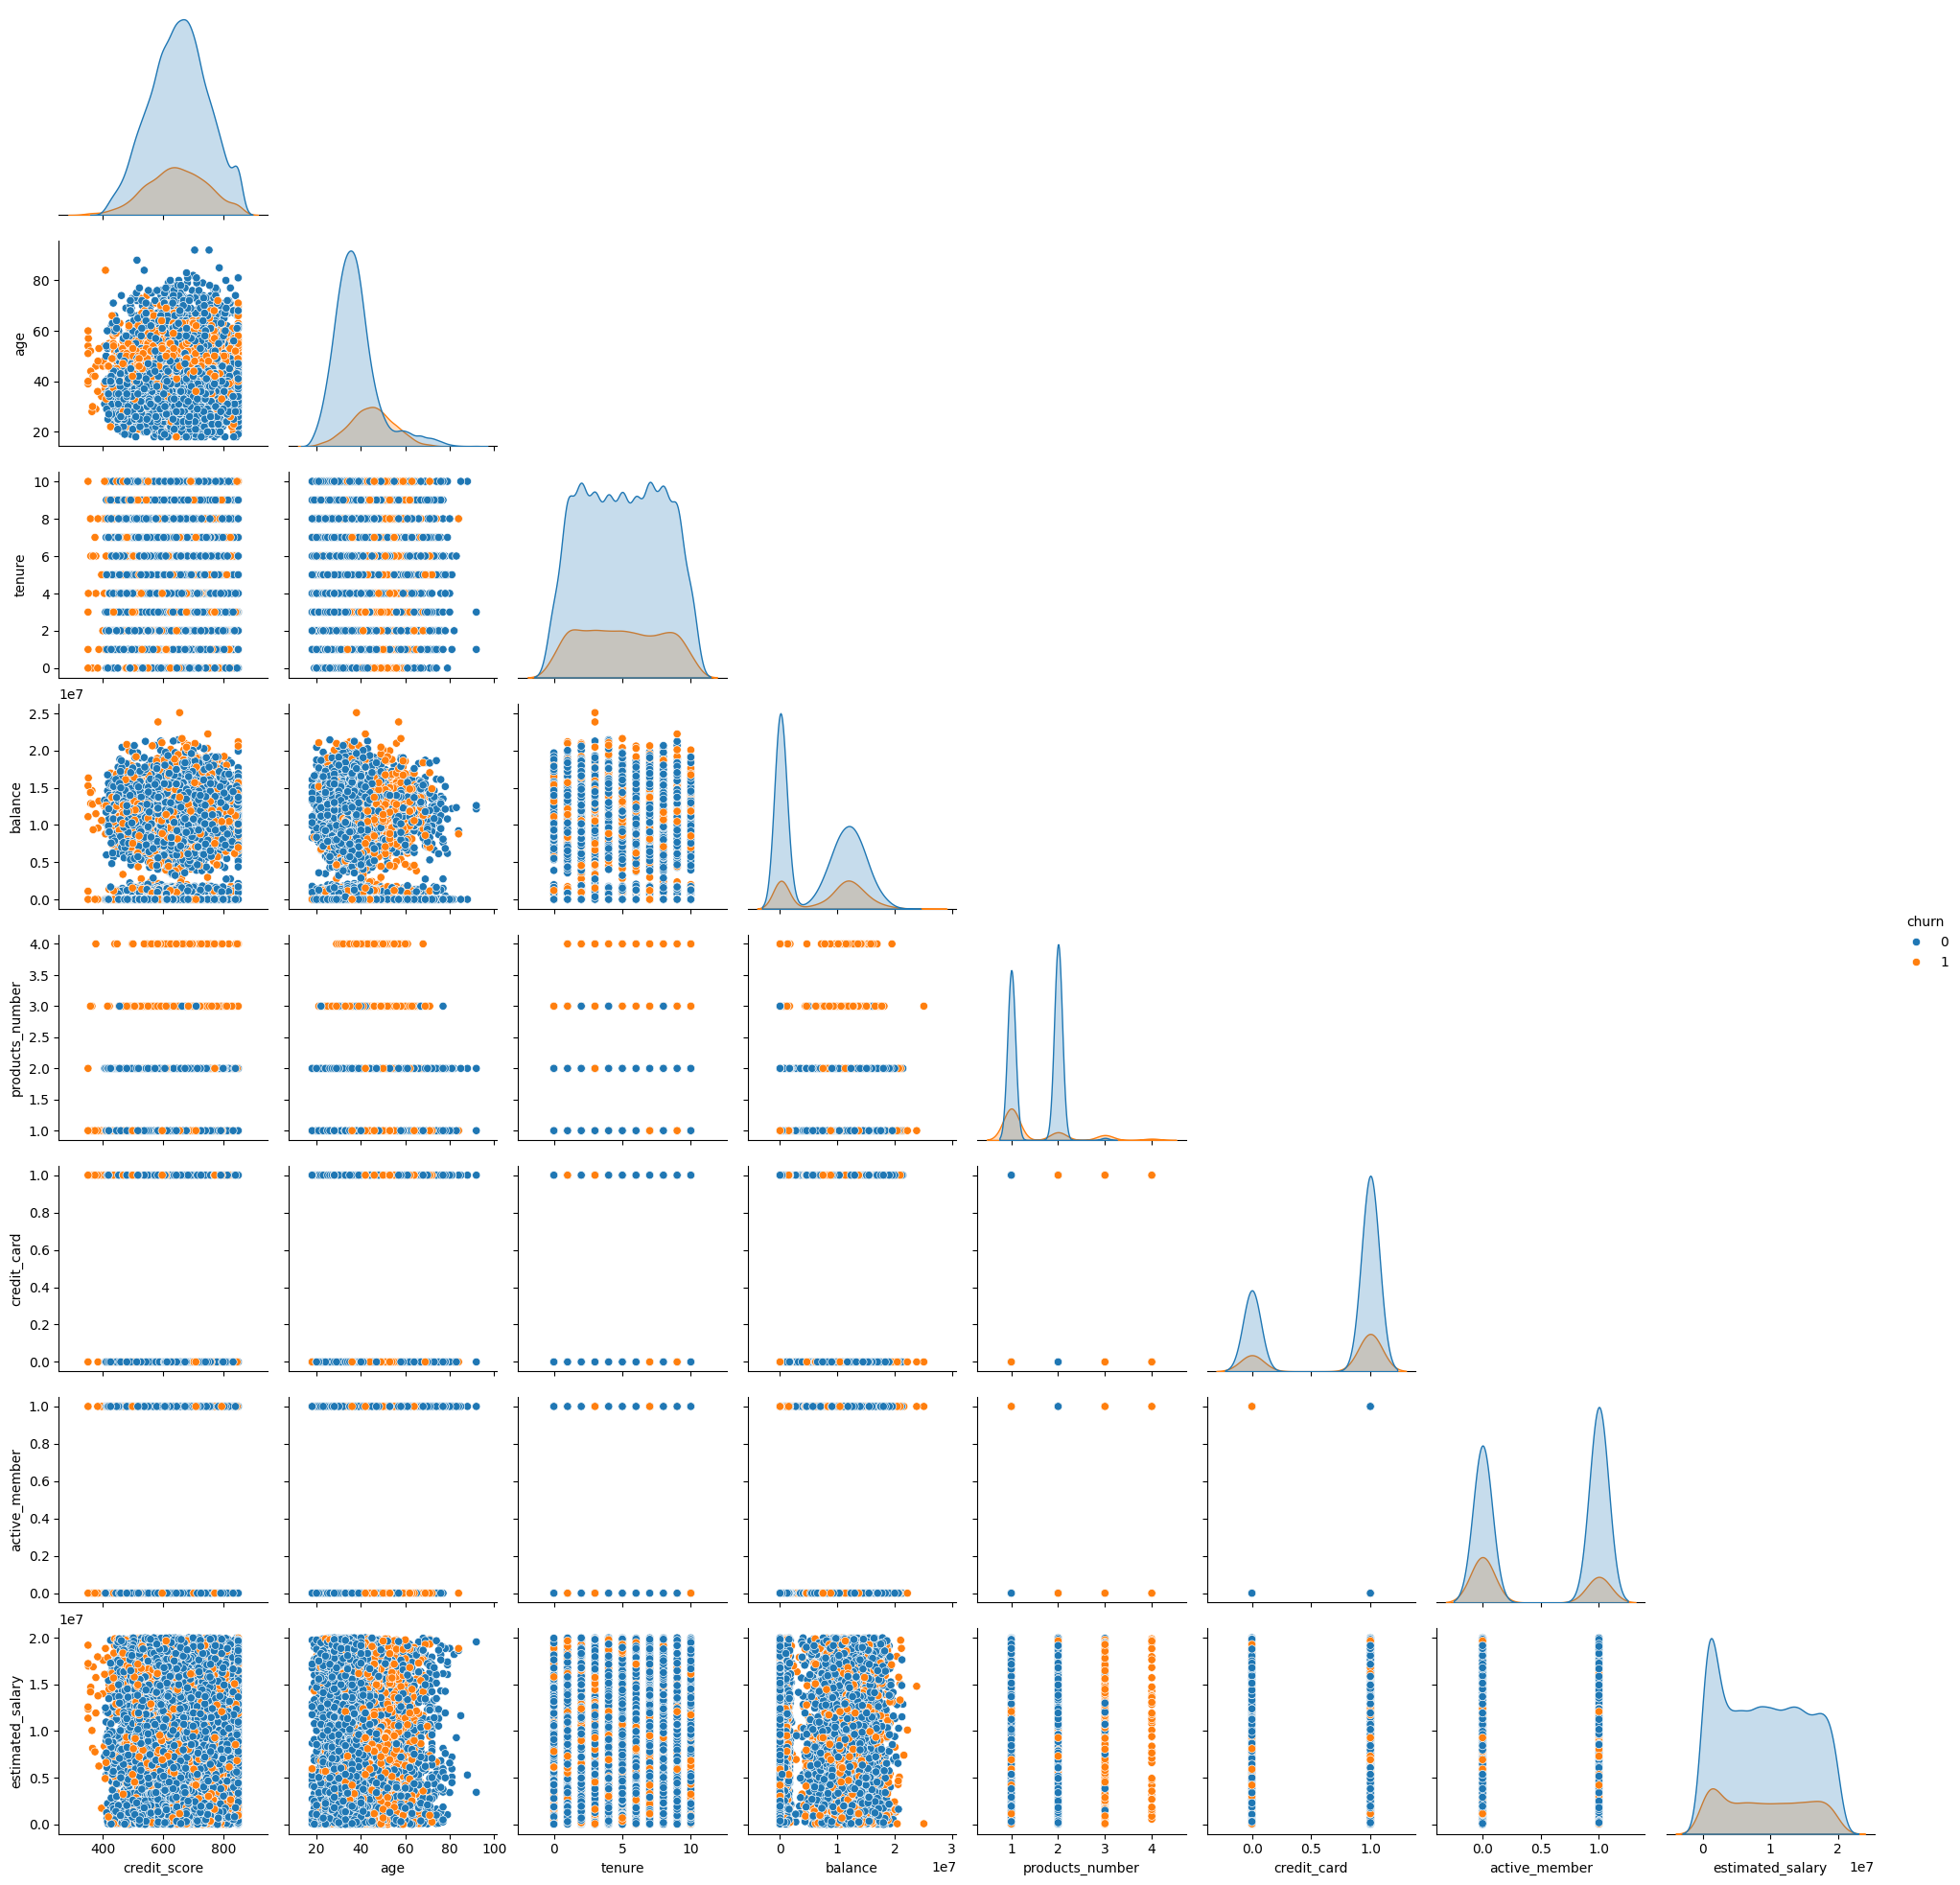

In [ ]:
#Distribution of target in numercal attributes
df_with_churn = df[num_columns].copy()
df_with_churn['churn'] = df['churn']

sns.pairplot(data=df_with_churn, hue='churn', corner=True)

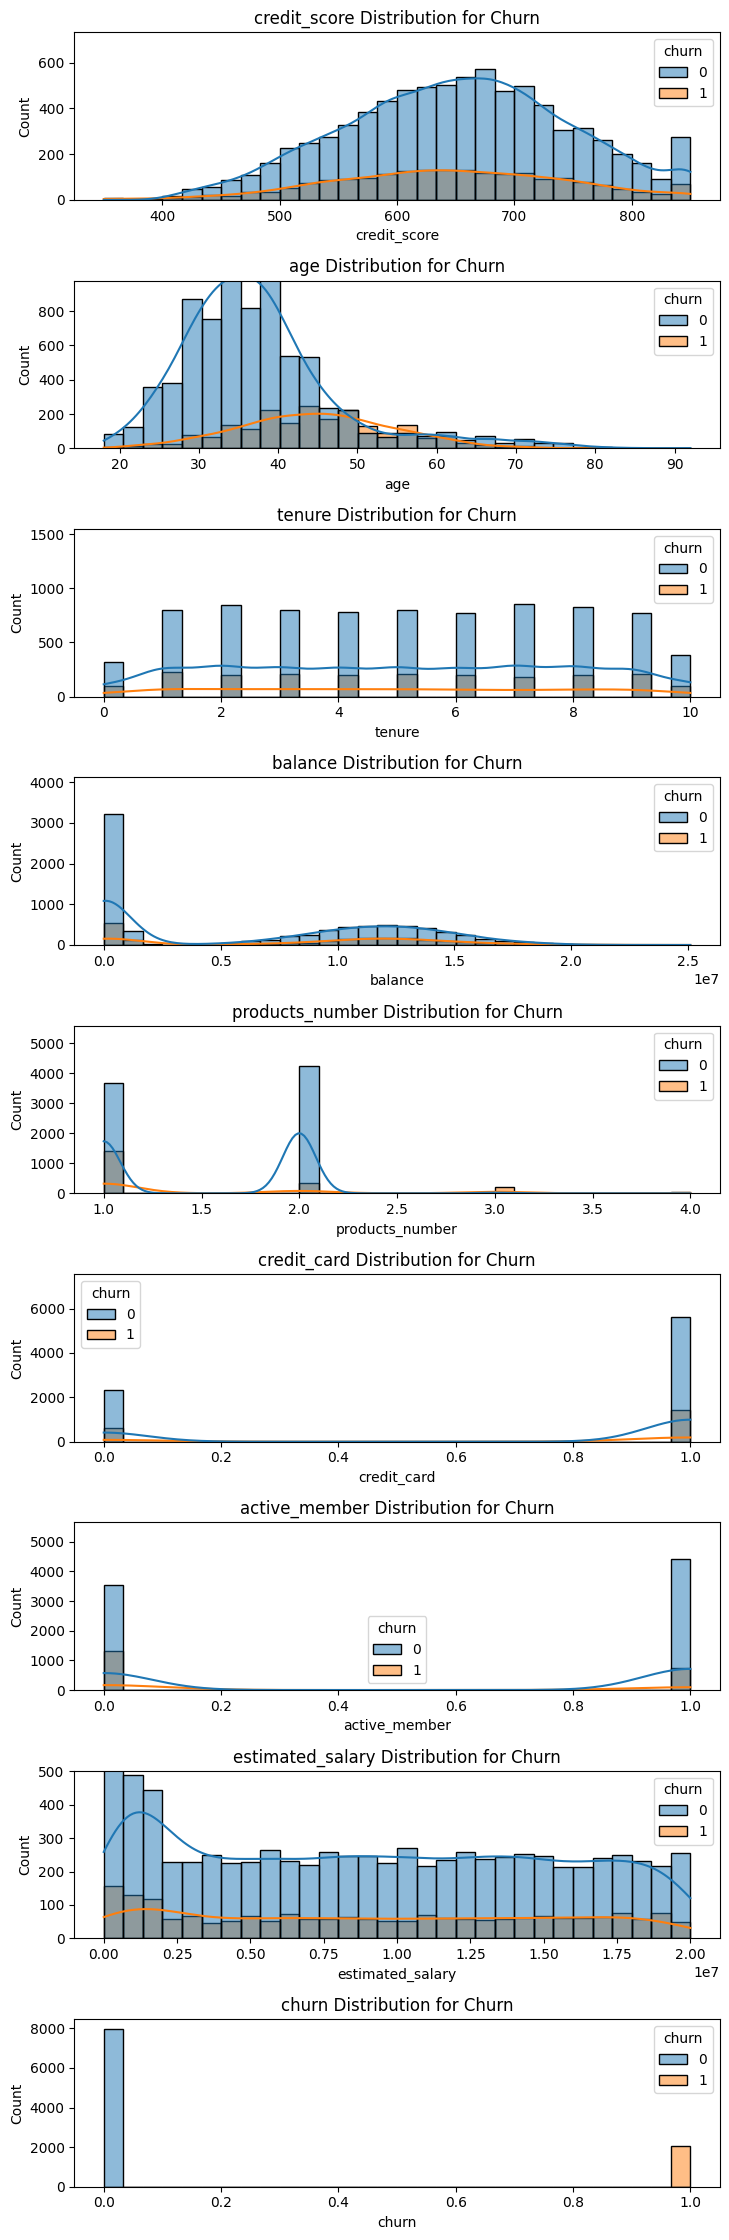

In [ ]:
plt.figure(figsize=(14, len(num_columns) * 2.5))
custom_palette = ['#1f77b4', '#ff7f0e']
for idx, column in enumerate(num_columns):
    # Plotting for outcome
    plt.subplot(len(num_columns), 2, idx*2+1)
    sns.histplot(x=column, hue="churn", data=df, bins=30, kde=True, palette=custom_palette)
    plt.title(f"{column} Distribution for Churn")
    plt.ylim(0, df[column].value_counts().max() + 500)

plt.tight_layout()
plt.show()

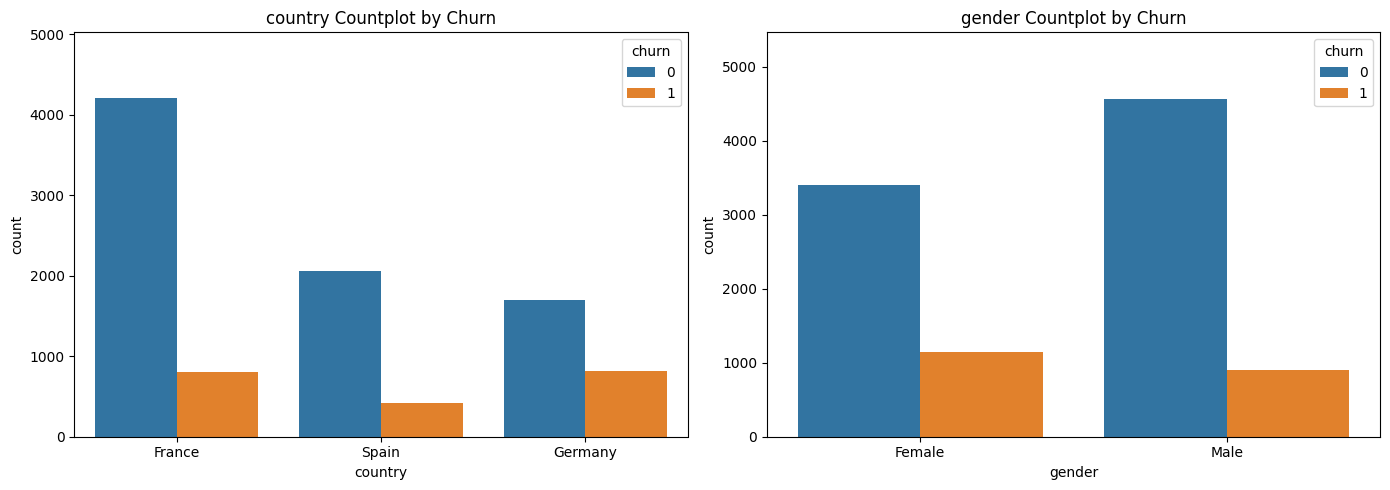

In [ ]:
plt.figure(figsize=(14, len(Cate_columns)*2.5))
custom_palette = ['#1f77b4', '#ff7f0e']

for idx, column in enumerate(Cate_columns):
    plt.subplot(len(Cate_columns)//2 + len(Cate_columns) % 2, 2, idx+1)
    sns.countplot(x=column, hue="churn", data=df, palette=custom_palette)
    plt.title(f"{column} Countplot by Churn")
    plt.ylim(0, df[column].value_counts().max() + 10)

plt.tight_layout()
plt.show()

# Train model

##Preprocessing

In [ ]:
#Label coder
df.gender.replace(['Female','Male'],[1,0], inplace = True)

In [ ]:
#One Hot
df = pd.get_dummies(df,columns =['country']).astype(int)

In [ ]:
#Scaler Data
std_columns = ['credit_score','balance','estimated_salary','age']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[std_columns] = scaler.fit_transform(df[std_columns])
df[std_columns]

,credit_score,balance,estimated_salary,age
0,-0,-1,0,0
1,-0,0,0,0
2,-2,-1,0,0
3,1,-1,0,0
4,2,1,-1,0
...,...,...,...,...
9995,1,-1,0,0
9996,-1,-0,0,-0
9997,1,-1,-1,-0
9998,1,0,0,0


In [ ]:
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,-0,1,0,2,-1,1,1,1,0,1,1,0,0
1,-0,1,0,1,0,1,0,1,0,0,0,0,1
2,-2,1,0,8,-1,3,1,0,0,1,1,0,0
3,1,1,0,1,-1,2,0,0,0,0,1,0,0
4,2,1,0,2,1,1,1,1,-1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,5,-1,2,1,0,0,0,1,0,0
9996,-1,0,-0,10,-0,1,1,1,0,0,1,0,0
9997,1,1,-0,7,-1,1,0,1,-1,1,1,0,0
9998,1,0,0,3,0,2,1,0,0,1,0,1,0


In [ ]:

X = df.drop(columns = 'churn')
y = df['churn']

##SMOTE

In [ ]:
def model_bef_SMOTE(model,X,y):
  X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
  model.fit(X_train,y_train)
  y_pred =  model.predict(X_test)
  print('\n classification report: \n', classification_report(y_test, y_pred))
  print('\n confussion matrix: \n', confusion_matrix(y_test, y_pred))

In [ ]:
def model_aft_SMOTE(model, x, y):
  X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.25, random_state = 42)
  X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
  model.fit(X_train_smote, y_train_smote)
  y_pred = model.predict(X_test)
  print('\n classification report: \n', classification_report(y_test, y_pred))
  print('\n confusion matrix: \n', confusion_matrix(y_test, y_pred))


### LogisticRegression SMOTE

In [ ]:
model = LogisticRegression()
model_bef_SMOTE(model,X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.56      0.21      0.30       497

    accuracy                           0.81      2500
   macro avg       0.70      0.58      0.60      2500
weighted avg       0.78      0.81      0.77      2500


 confussion matrix: 
 [[1923   80]
 [ 395  102]]


In [ ]:
model = LogisticRegression()
model_aft_SMOTE(model,X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      2003
           1       0.40      0.64      0.49       497

    accuracy                           0.74      2500
   macro avg       0.65      0.70      0.66      2500
weighted avg       0.80      0.74      0.76      2500


 confusion matrix: 
 [[1524  479]
 [ 181  316]]


=> LogisticRegression:  SMOTE better





### DecisionTreeClassifier

In [ ]:
model =  DecisionTreeClassifier()
model_bef_SMOTE(model,X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2003
           1       0.49      0.54      0.51       497

    accuracy                           0.80      2500
   macro avg       0.69      0.70      0.69      2500
weighted avg       0.80      0.80      0.80      2500


 confussion matrix: 
 [[1722  281]
 [ 229  268]]


In [ ]:
model = DecisionTreeClassifier()
model_aft_SMOTE(model,X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      2003
           1       0.44      0.55      0.49       497

    accuracy                           0.77      2500
   macro avg       0.66      0.69      0.67      2500
weighted avg       0.79      0.77      0.78      2500


 confusion matrix: 
 [[1651  352]
 [ 223  274]]


DecisionTreeClassifier: SMOTE better

### RandomForestClassifier

In [ ]:
model =RandomForestClassifier()
model_bef_SMOTE(model,X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500


 confussion matrix: 
 [[1934   69]
 [ 263  234]]


In [ ]:
model = RandomForestClassifier()
model_aft_SMOTE(model, X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2003
           1       0.60      0.61      0.60       497

    accuracy                           0.84      2500
   macro avg       0.75      0.76      0.75      2500
weighted avg       0.84      0.84      0.84      2500


 confusion matrix: 
 [[1796  207]
 [ 192  305]]


=> RandomForestClassifier: SMOTE better

### Support Vector Machine

In [ ]:
model = SVC()
model_bef_SMOTE(model,X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      2003
           1       0.94      0.14      0.24       497

    accuracy                           0.83      2500
   macro avg       0.88      0.57      0.57      2500
weighted avg       0.85      0.83      0.77      2500


 confussion matrix: 
 [[1999    4]
 [ 429   68]]


In [ ]:
model = SVC()
model_aft_SMOTE(model,X,y)


 classification report: 
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      2003
           1       0.48      0.70      0.57       497

    accuracy                           0.79      2500
   macro avg       0.70      0.76      0.71      2500
weighted avg       0.83      0.79      0.80      2500


 confusion matrix: 
 [[1620  383]
 [ 147  350]]


LinearSVC : SMOTE better

### => Decided to choose SMOTE

#GridSearchCV model

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.25, random_state = 42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GridSearchCV(RandomForestClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [10 ,50, 100, 200],
    }),
    GridSearchCV(SVC(), param_grid={
        'C': [1, 10],
        'kernel': ['linear', 'rbf']
    }),
    GridSearchCV(AdaBoostClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(GradientBoostingClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(LGBMClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(XGBClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
]

In [ ]:
for model in models:
    _model = model
    _model.fit(X_train_smote, y_train_smote)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      2003
           1       0.39      0.64      0.49       497

    accuracy                           0.73      2500
   macro avg       0.64      0.70      0.65      2500
weighted avg       0.79      0.73      0.75      2500

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2003
           1       0.41      0.55      0.47       497

    accuracy                           0.76      2500
   macro avg       0.65      0.68      0.66      2500
weighted avg       0.79      0.76      0.77      2500

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2003
           1       0.59      0.62      0.61   

#Conclusion
AdaBoostClassifier

BEST PARAM: {'n_estimators': 200}

              precision    recall  f1-score   support
           0       0.92      0.84      0.88      2003
           1       0.52      0.70      0.60       497